In [199]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from matplotlib import rc
from matplotlib.ticker import FormatStrFormatter
plt.style.use('ggplot')

In [200]:
df = pd.read_csv('.\Accidentes_limpio.csv')

Corroboramos si hay duplicados

In [201]:
df.loc[df.duplicated()]

,Date,Year,Month,Time,City/State,Country,Operator,Military,Route,Type,Aboard,Fatalities,Crew_Fatalities,Summary,Weather_Accident


Cantidad de datos nulos por columna

In [202]:
df.isna().sum()

Date                   0
Year                   0
Month                  0
Time                1721
City/State             5
Country              196
Operator              10
Military               0
Route                763
Type                  13
Aboard                 0
Fatalities             0
Crew_Fatalities        0
Summary               59
Weather_Accident       0
dtype: int64

------------------------------------------------------------------------------------------------------------------------------------------------------

<h1>
 <b>Top 10 años con más accidentes</b>
</h1>

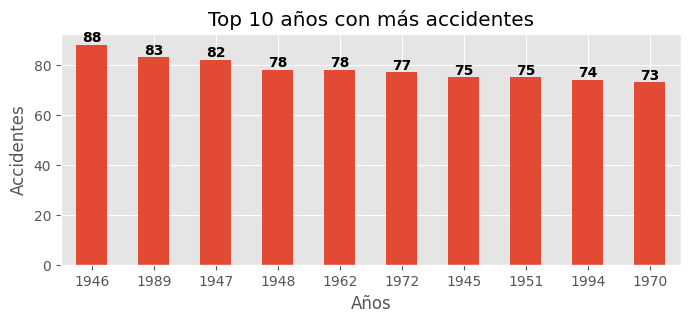

In [203]:
ax = df['Year'].value_counts() \
    .head(10) \
    .plot(kind='bar', title='Top 10 años con más accidentes', figsize=(8, 3))

ax.set_xlabel('Años')
ax.set_ylabel('Accidentes')
ax.tick_params(axis='x', rotation=0)

# Agregar los números exactos de accidentes en las barras
for i, v in enumerate(df['Year'].value_counts().head(10)):
    ax.text(i, v, str(v), ha='center', va='bottom', fontsize=10, color='black', fontweight='bold')

------------------------------------------------------------------------------------------------------------------------------------------------------

<h1>
 <b>Gráfico general de todos los años con su respectiva cantidad de accidentes</b>
</h1>

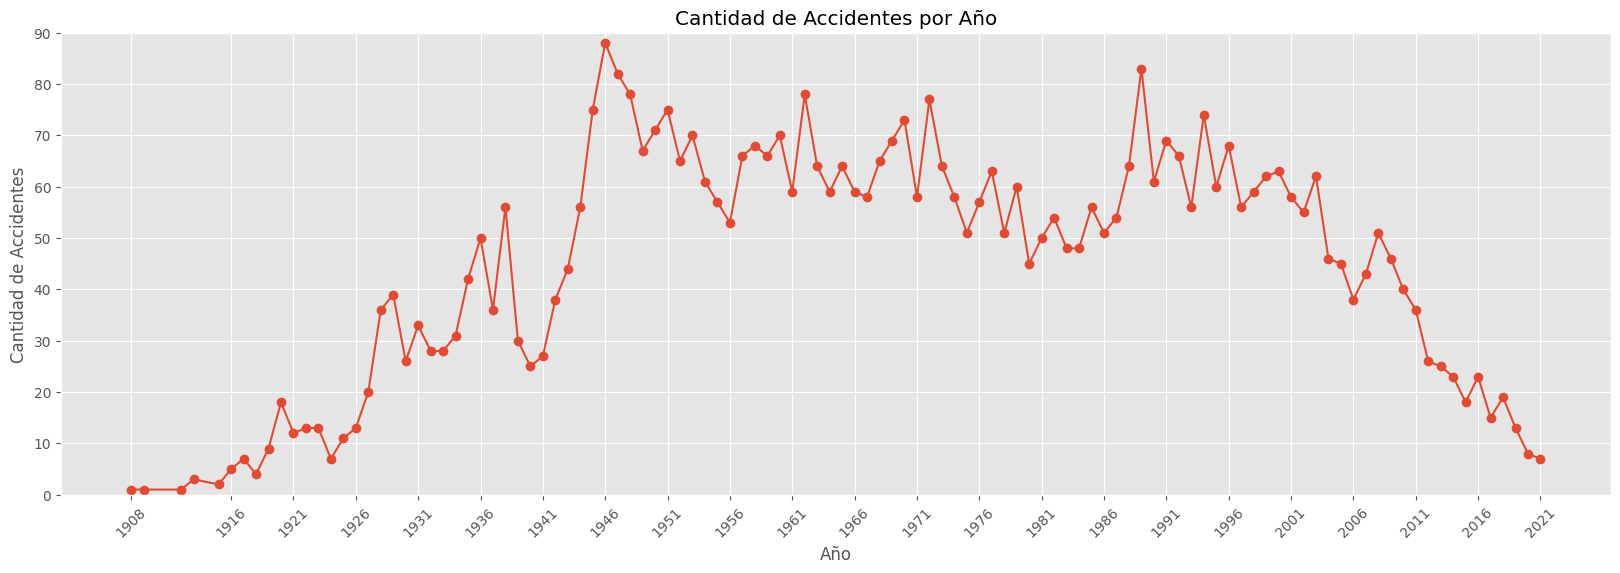

In [204]:
accidentes_por_anio = df['Year'].value_counts().sort_index()

# Crear el gráfico lineal
plt.figure(figsize=(20, 6))  # Ajusta el tamaño del gráfico si es necesario
plt.plot(accidentes_por_anio.index, accidentes_por_anio.values, marker='o', linestyle='-')

# Personalizar el gráfico
plt.title('Cantidad de Accidentes por Año')
plt.xlabel('Año')
plt.ylabel('Cantidad de Accidentes')

# Limitar el número de etiquetas en el eje x
step = len(accidentes_por_anio.index) // 20
plt.xticks(accidentes_por_anio.index[::step], rotation=45)  # Rotar las etiquetas para que sean legibles

# Limitar el rango de valores en el eje y
plt.ylim(0, max(accidentes_por_anio.values) + 2)  # Ajusta el rango según tus datos

# Mostrar el gráfico
plt.grid(True)  # Agregar cuadrícula si lo deseas
plt.show()

El pico más alto se da en el marco de la segunda guerra mundial que transcurrió entre 1939 y 1945.

Se nota un descenso notable de accidentes alrededor del 2001 hasta el último registro.

------------------------------------------------------------------------------------------------------------------------------------------------------

<h1>
 <b>Cuales fueron los meses donde más accidentes hubo en total</b>
</h1>

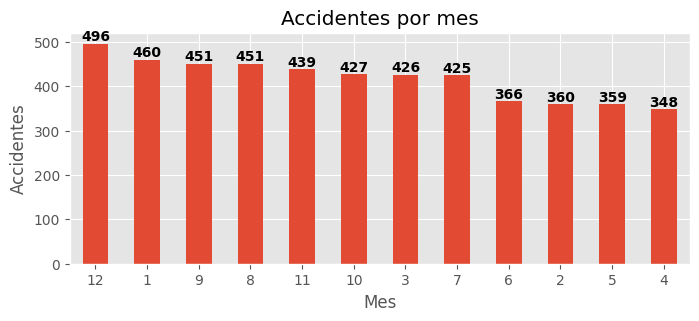

In [205]:
ax = df['Month'].value_counts() \
    .plot(kind='bar', title='Accidentes por mes', figsize=(8, 3))

ax.set_xlabel('Mes')
ax.set_ylabel('Accidentes')
ax.tick_params(axis='x', rotation=0)

# Agregar los números exactos de accidentes en las barras
for i, v in enumerate(df['Month'].value_counts()):
    ax.text(i, v, str(v), ha='center', va='bottom', fontsize=10, color='black', fontweight='bold')

------------------------------------------------------------------------------------------------------------------------------------------------------

<h1>
 <b>Cuales fueron los horarios mas frecuentes en los que ocurrieron los accidentes</b>
</h1>

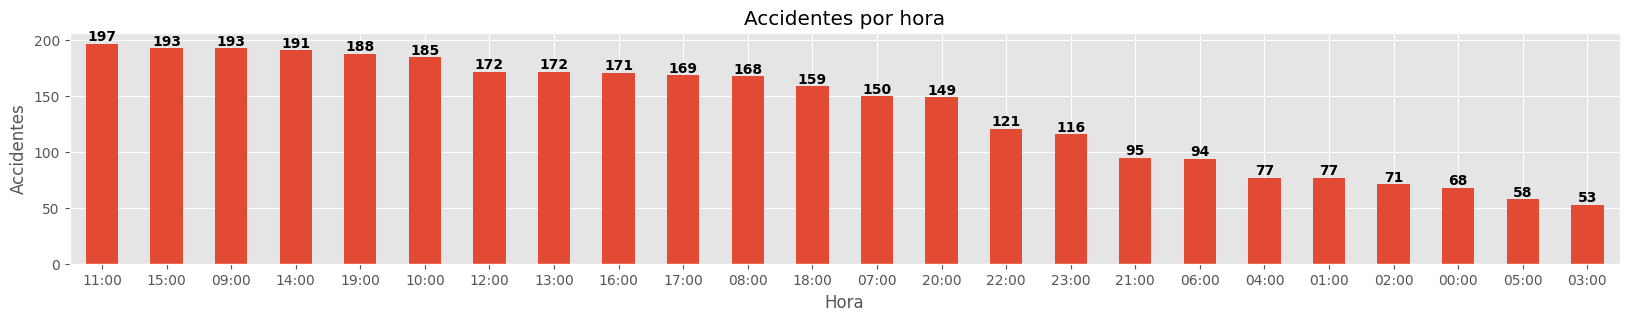

In [206]:
ax = df['Time'].value_counts() \
    .plot(kind='bar', title='Accidentes por hora', figsize=(20, 3))

ax.set_xlabel('Hora')
ax.set_ylabel('Accidentes')
ax.tick_params(axis='x', rotation=0)

# Agregar los números exactos de accidentes en las barras
for i, v in enumerate(df['Time'].value_counts()):
    ax.text(i, v, str(v), ha='center', va='bottom', fontsize=10, color='black', fontweight='bold')

Se puede observar que en los horarios de madrugada fueron donde menos accidentes hubo

------------------------------------------------------------------------------------------------------------------------------------------------------

<h1>
 <b>Top 10 Ciudades/Estado donde ocurrieron más accidentes</b>
</h1>

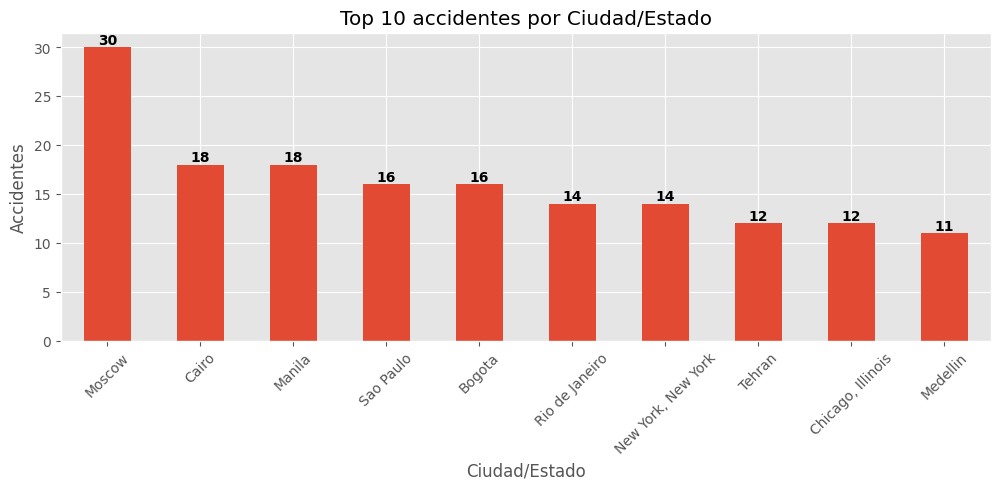

In [207]:
ax = df['City/State'].value_counts() \
    .head(10) \
    .plot(kind='bar', title='Top 10 accidentes por Ciudad/Estado', figsize=(12, 4))

ax.set_xlabel('Ciudad/Estado')
ax.set_ylabel('Accidentes')
ax.tick_params(axis='x', rotation=45)
ax.yaxis.set_major_formatter(FormatStrFormatter('%d'))

# Agregar los números exactos de accidentes en las barras
for i, v in enumerate(df['City/State'].value_counts().head(10)):
    ax.text(i, v, str(v), ha='center', va='bottom', fontsize=10, color='black', fontweight='bold')

------------------------------------------------------------------------------------------------------------------------------------------------------

<h1>
 <b>Top 10 Países con mas accidentes</b>
</h1>

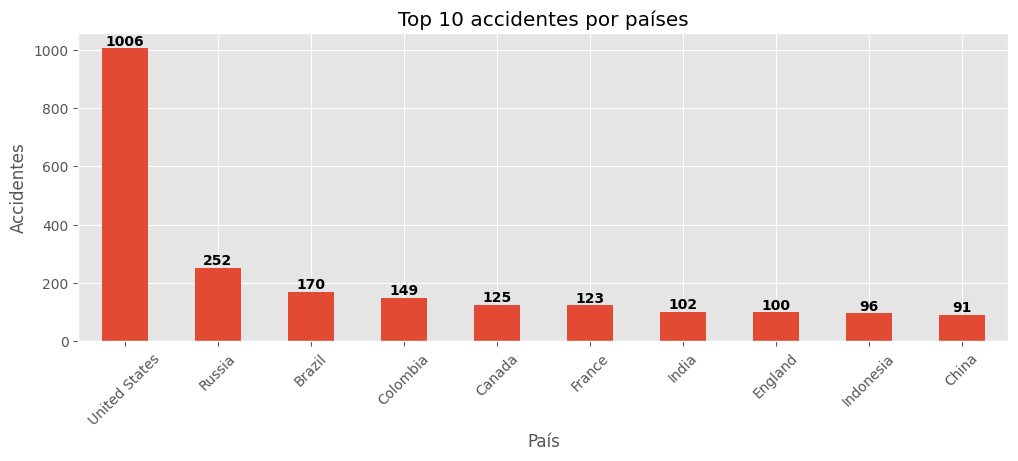

In [208]:
ax = df['Country'].value_counts() \
    .head(10) \
    .plot(kind='bar', title='Top 10 accidentes por países', figsize=(12, 4))

ax.set_xlabel('País')
ax.set_ylabel('Accidentes')
ax.tick_params(axis='x', rotation=45)
ax.yaxis.set_major_formatter(FormatStrFormatter('%d'))

# Agregar los números exactos de accidentes en las barras
for i, v in enumerate(df['Country'].value_counts().head(10)):
    ax.text(i, v, str(v), ha='center', va='bottom', fontsize=10, color='black', fontweight='bold')

Se puede observar que Estados Unidos tuvo 10 veces más accidentes que el resto de países

------------------------------------------------------------------------------------------------------------------------------------------------------

<h1>
 <b>Top 5 accidentes por ruta</b>
</h1>

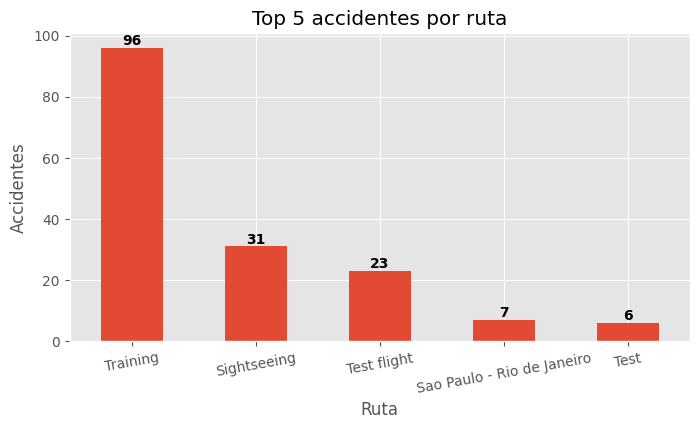

In [209]:
ax = df['Route'].value_counts() \
    .head(5) \
    .plot(kind='bar', title='Top 5 accidentes por ruta', figsize=(8, 4))

ax.set_xlabel('Ruta')
ax.set_ylabel('Accidentes')
ax.tick_params(axis='x', rotation=10)
ax.yaxis.set_major_formatter(FormatStrFormatter('%d'))

# Agregar los números exactos de accidentes en las barras
for i, v in enumerate(df['Route'].value_counts().head(5)):
    ax.text(i, v, str(v), ha='center', va='bottom', fontsize=10, color='black', fontweight='bold')

La mayor cantidad de accidentes se dió en vuelos de entrenamiento

------------------------------------------------------------------------------------------------------------------------------------------------------

<h1>
 <b>Top 10 operadores con más accidentes</b>
</h1>

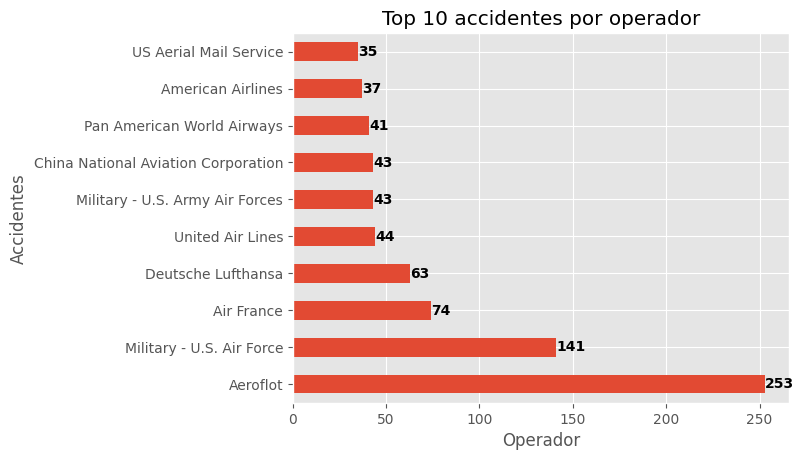

In [210]:
ax = df['Operator'].value_counts() \
    .head(10) \
    .plot(kind='barh', title='Top 10 accidentes por operador')

ax.set_xlabel('Operador')
ax.set_ylabel('Accidentes')

for i, v in enumerate(df['Operator'].value_counts().head(10)):
    ax.text(v, i, str(v), va='center', fontsize=10, color='black', fontweight='bold')

El operador Aeroflot es la aerolínea de bandera de la Federación de Rusia​​ y la mayor de las existentes en el país.​​​ Opera servicios de pasajeros y de carga a destinos nacionales e internacionales, principalmente desde su centro de operaciones en el Aeropuerto Internacional de Moscú-Sheremétievo. 

------------------------------------------------------------------------------------------------------------------------------------------------------

<h1>
 <b>Identificar cuantos accidentes aéreos ocurrieron con operadores militares</b>
</h1>

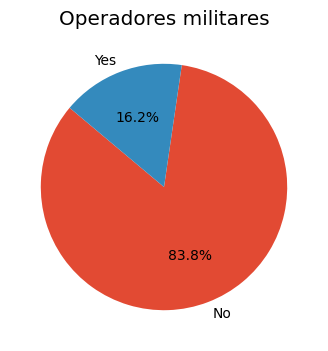

In [211]:
# Calcular los valores para el gráfico de pastel
data = df['Military'].value_counts()

# Crear el gráfico de pastel
plt.figure(figsize=(4, 4))
plt.pie(data, labels=data.index, autopct='%1.1f%%', startangle=140)
plt.title('Operadores militares')

# Mostrar el gráfico
plt.show()

Solamente el 16% de los accidentes aéreos ocurrió con operadores militares

------------------------------------------------------------------------------------------------------------------------------------------------------

<h1>
 <b>Top 10 tipos de vehículos aereos</b>
</h1>

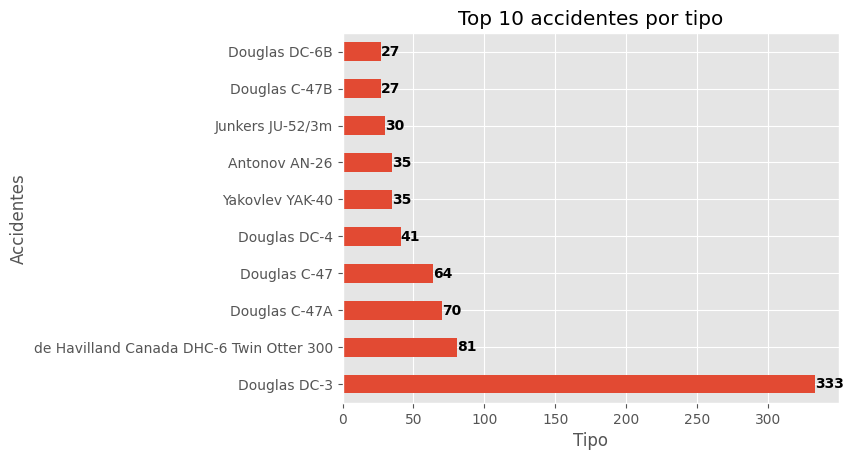

In [212]:
ax = df['Type'].value_counts() \
    .head(10) \
    .plot(kind='barh', title='Top 10 accidentes por tipo')

ax.set_xlabel('Tipo')
ax.set_ylabel('Accidentes')

for i, v in enumerate(df['Type'].value_counts().head(10)):
    ax.text(v, i, str(v), va='center', fontsize=10, color='black', fontweight='bold')

El Douglas DC-3 fue uno de los aviones de transporte más importantes en la segunda guerra mundial

------------------------------------------------------------------------------------------------------------------------------------------------------

<h1>
 <b>Personas a bordo, fallecidos, tripulación fallecida y sobrevivientes</b>
</h1>

In [213]:
suma_aboard = df['Aboard'].sum()
print(f'Total de personas a bordo: {suma_aboard}')

suma_fatalities = df['Fatalities'].sum()
print(f'Fallecidos: {suma_fatalities}')

suma_crew_fatalities = df['Crew_Fatalities'].sum()
print(f'Tripulación fallecida: {suma_crew_fatalities}')

total_survivors = suma_aboard - suma_fatalities
print(f'sobrevivientes: {total_survivors}')

Total de personas a bordo: 155326
Fallecidos: 111470
Tripulación fallecida: 17122
sobrevivientes: 43856


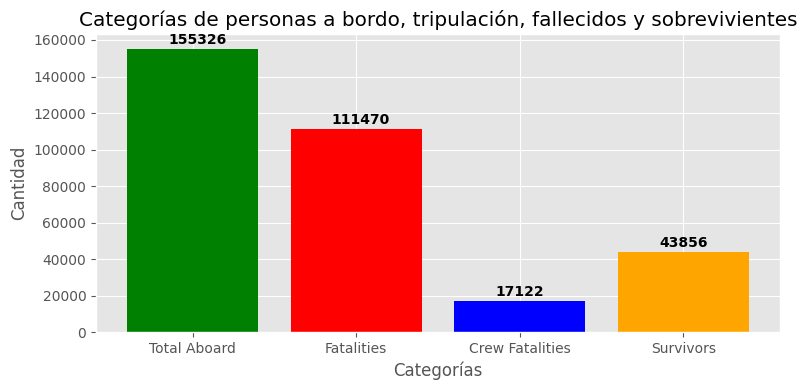

In [214]:
categories = ['Total Aboard', 'Fatalities', 'Crew Fatalities', 'Survivors']
values = [suma_aboard, suma_fatalities, suma_crew_fatalities, total_survivors]

# Crear el gráfico de barras
plt.figure(figsize=(8, 4))
bars = plt.bar(categories, values, color=['green', 'red', 'blue', 'orange'])
plt.xlabel('Categorías')
plt.ylabel('Cantidad')
plt.title('Categorías de personas a bordo, tripulación, fallecidos y sobrevivientes')
plt.xticks(rotation=0)
plt.tight_layout()

# Agregar los números exactos en las barras
for bar, value in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.15, value + 1000, str(value), ha='left', va='bottom', fontsize=10, color='black', fontweight='bold')

# Mostrar el gráfico
plt.show()

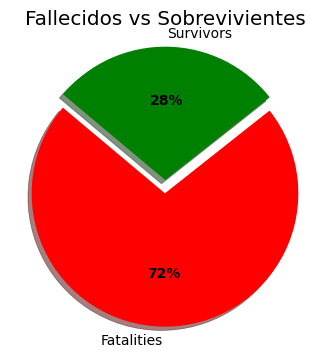

In [215]:
# Datos
fatalities = suma_fatalities
survivors = total_survivors

# Etiquetas
labels = 'Fatalities', 'Survivors'

# Tamaños
sizes = [fatalities, survivors]

# Colores
colors = ['red', 'green']

# Separación de la rebanada "Fatalities"
explode = (0.1, 0)

# Crear el gráfico de pastel
fig, ax = plt.subplots(figsize=(4, 4))
wedges, texts, autotexts = ax.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='', shadow=True, startangle=140)
plt.axis('equal')  # Para asegurar que el gráfico sea circular
plt.title('Fallecidos vs Sobrevivientes')

# Agregar el porcentaje en negrita dentro del gráfico
for i, text in enumerate(autotexts):
    text.set_text(f'{sizes[i] / sum(sizes) * 100:.0f}%')
    text.set_fontweight('bold')

plt.show()


Solo sobrevivieron aproximadamente el 28% de las personas en los accidentes

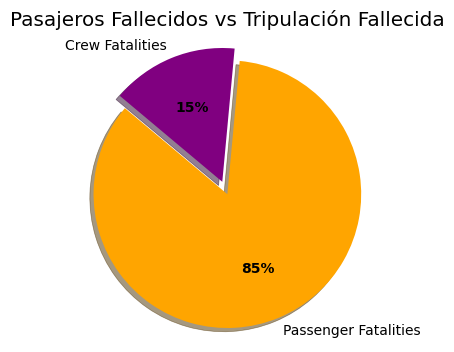

In [216]:
# Datos
passenger_fatalities = suma_fatalities - suma_crew_fatalities
crew_fatalities = suma_crew_fatalities

# Etiquetas
labels = 'Passenger Fatalities', 'Crew Fatalities'

# Tamaños
sizes = [passenger_fatalities, crew_fatalities]

# Colores
colors = ['orange', 'purple']

# Separación de la rebanada "Passenger Fatalities" para resaltarla
explode = (0.1, 0)

# Crear el gráfico de pastel
fig, ax = plt.subplots(figsize=(4, 4))
wedges, texts, autotexts = ax.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='', shadow=True, startangle=140)
plt.axis('equal')  # Para asegurar que el gráfico sea circular
plt.title('Pasajeros Fallecidos vs Tripulación Fallecida')

# Agregar los resultados en negrita dentro del gráfico
for i, text in enumerate(autotexts):
    text.set_text(f'{sizes[i] / sum(sizes) * 100:.0f}%')
    text.set_fontweight('bold')

plt.show()

En relación al total de fallecidos, aproximadamente el 15% corresponde a tripulación

------------------------------------------------------------------------------------------------------------------------------------------------------

<h1>
 <b>Cantidad de accidentes basados en eventos climáticos y meteorológicos</b>
</h1>

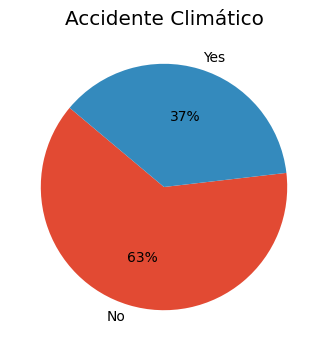

In [217]:
# Calcular los valores para el gráfico de pastel
data = df['Weather_Accident'].value_counts()

# Crear el gráfico de pastel
plt.figure(figsize=(4, 4))
plt.pie(data, labels=data.index, autopct='%1.0f%%', startangle=140)
plt.title('Accidente Climático')

# Mostrar el gráfico
plt.show()

Aproximadamente el 37% de los accidentes fueron por inclemencias climáticas